In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Project 5: Initial Value Problems
You must complete each question and answer all parts. Read carefully. Some questions are meant to be exploratory and open-ended. Your submissions must be organized. If you are not using a jupyter notebook, you will have to include all required figures and reference the figures in your answers (e.g., "...see Figure 1 in attached file" with Figure 1 labeled in a separately attached file).


I expect a write up that demonstrates both how and why everything was done. All figures should be clearly labeled with axes labels, titles, and legends. Any code must be included. Any suspection of AI-generating or external code-writing tools will result in a meeting with me.

## Forward Euler and RK2

### Question 1 (Forward Euler)
Write a function `forward_euler` that implements the Forward Euler algorithm to solve
\begin{equation}
\frac{dx}{dt} = f(t,x), \quad x(0) = x_0
\end{equation}
Your function should accept the following arguments: `f, x0, t0, tf, h`.

In [3]:
def Forward_Euler(f,x0,t0,tf,h):
    t_values = np.append(np.arange(t0,tf,h),tf)
    x_values = np.zeros(np.shape(t_values)[0])
    x_values[0] = x0
    
    for i in range(1, np.shape(t_values)[0] ):
        if i == np.shape(t_values)[0]-1:
            x_values[i] = (t_values[i]-t_values[i-1]) * f(t_values[i-1], x_values[i-1]) + x_values[i-1]
        else:
            x_values[i] = h * f(t_values[i-1], x_values[i-1]) + x_values[i-1]
    
    return t_values, x_values

### Question 1 (RK2)
Write a function `modified_euler` that implements the second order Runge-Kutta method (improved Euler) algorithm to solve
\begin{equation}
\frac{dx}{dt} = f(t,x), \quad x(0) = x_0
\end{equation}
Your function should accept the following arguments: `f, x0, t0, tf, h`.

In [4]:
def Modified_Euler(f,x0,t0,tf,h):
    
    t_values = np.append(np.arange(t0,tf,h),tf) #
    x_values = np.zeros(np.shape(t_values)[0])  # initialize t_value and x_value arrays
    x_values[0] = x0                            #

    for i in range( 1, np.shape(t_values)[0] ):
        if i == np.shape(t_values)[0]-1: 
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = x_values[i-1] + (t_values[i]-t_values[i-1])/2 * M1
            x_values[i] = x_values[i-1] + (t_values[i]-t_values[i-1]) * f( t_values[i-1] + (t_values[i]-t_values[i-1])/2, M2)
        else:
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = x_values[i-1] + h/2 * M1
            x_values[i] = x_values[i-1] + h*f( t_values[i-1] + h/2, M2 )

    return t_values, x_values

### Question 3 (Testing Euler and RK2)
Consider the differential equation,
\begin{equation}
\frac{dx}{dt} = x^2\cos(\pi t), \quad x(0) = 2
\end{equation}
and its exact solution
\begin{equation}
x(t) = \frac{-2\pi}{2\sin(\pi t) - \pi}
\end{equation}

For the step-sizes $h=[0.1, \ \ , 0.01, \ \ , 0.001, \ \ , 0.0001]$, solve the above differential equation on the time interval $0\leq t \leq 8.5$ using Forward Euler and Modified Euler. In each case, calculate the error at $t=8.5$.

Include three graphs, all plotted separately:
* A plot of the true solution against each Forward Euler estimate. Plot the true solution in black. For the true solution plot, include enough points so that it appears smooth.
* A plot of the true solution against each Modified Euler estimate. Plot the true solution in black. For the true solution plot, include enough points so that it appears smooth.
* A log-log plot of the errors from Forward Euler and Modified Euler


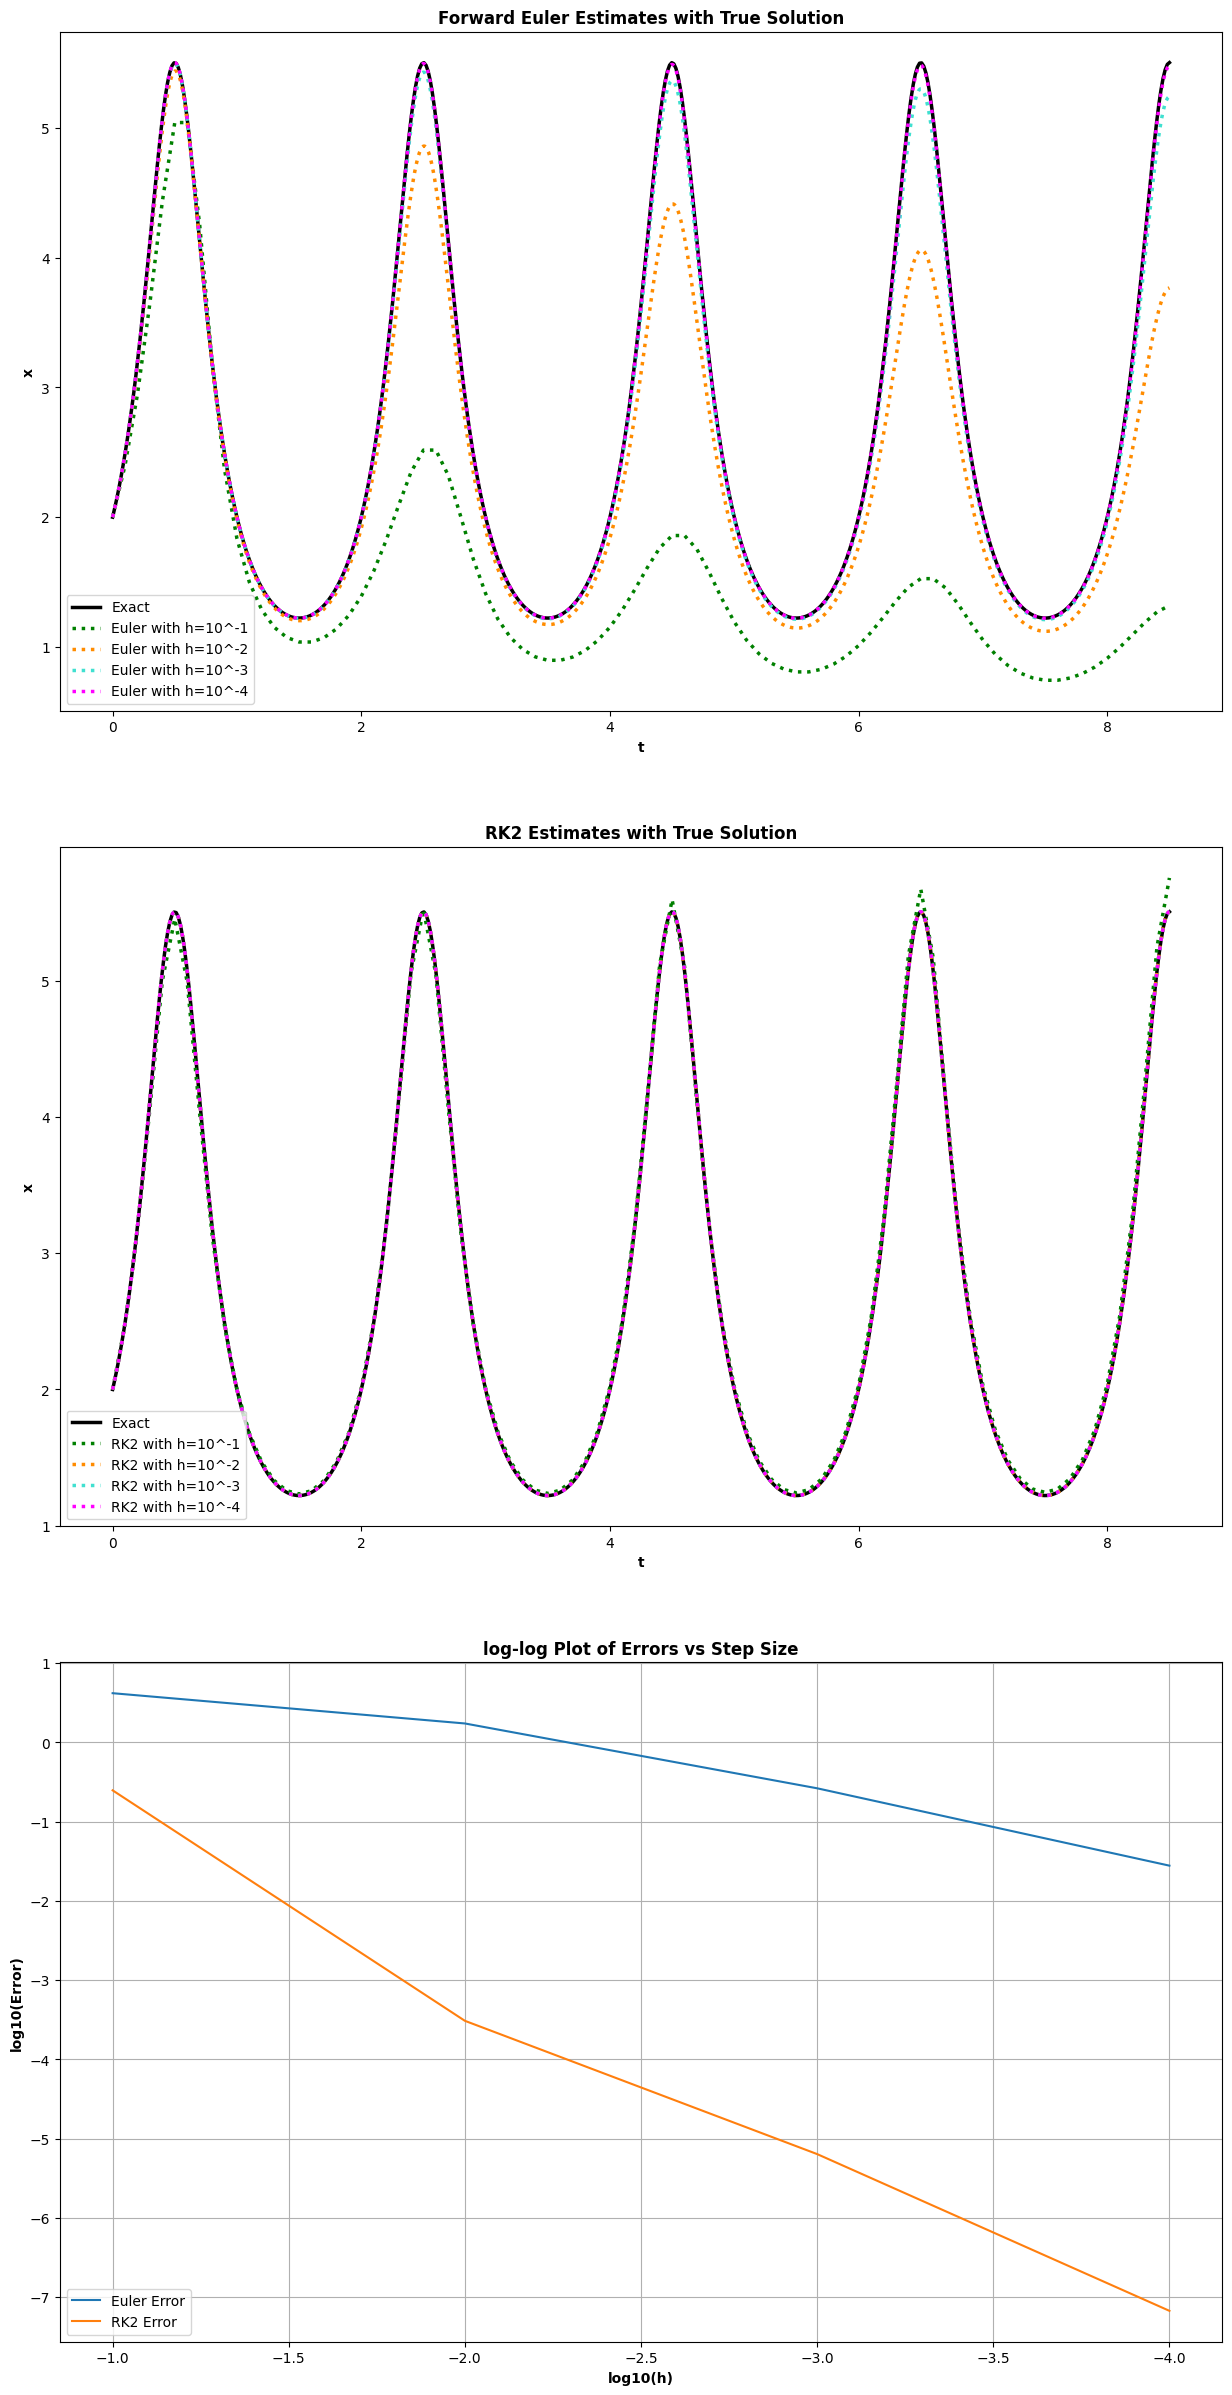

In [5]:
def f(t,x):
    return x**2*np.cos(np.pi*t)

def sol(t):
    return -2*np.pi/(2*np.sin(np.pi*t)-np.pi)

t_sol = np.linspace(0,8.5,500)

fig, axs = plt.subplots(3,1,figsize=(15,30))

Euler_errs = []
RK2_errs = []

axs[0].plot(t_sol,sol(t_sol), color='black',linewidth=2.5, label='Exact')
axs[1].plot(t_sol,sol(t_sol), color='black',linewidth=2.5, label='Exact')

colors=['green','darkorange','turquoise','magenta']

for i in range(1,5):
    Euler_tvals, Euler_xvals = Forward_Euler(f,2,0,8.5,10**-i) 
    RK2_tvals, RK2_xvals = Modified_Euler(f,2,0,8.5,10**-i)
    axs[0].plot(Euler_tvals, Euler_xvals, linestyle=':', linewidth=2.5, c=colors[i-1],label=f'Euler with h=10^-{i}')
    axs[1].plot(RK2_tvals, RK2_xvals, linestyle=':', linewidth=2.5, c=colors[i-1], label=f'RK2 with h=10^-{i}')
    Euler_errs.append(abs(sol(8.5)-Euler_xvals[-1]))
    RK2_errs.append(abs(sol(8.5)-RK2_xvals[-1]))

axs[0].legend(loc='lower left')
axs[1].legend(loc='lower left')
axs[0].set_title('Forward Euler Estimates with True Solution', fontweight='bold')
axs[1].set_title('RK2 Estimates with True Solution', fontweight='bold')
axs[0].set_xlabel('t', fontweight='bold')
axs[1].set_xlabel('t', fontweight='bold')
axs[0].set_ylabel('x', fontweight='bold')
axs[1].set_ylabel('x', fontweight='bold')

#-------------------------------------------------------------------------------------------------------------------#

logEuler = np.log10(Euler_errs)
logRK2 = np.log10(RK2_errs)
logt = [-i for i in range(1,5)]

axs[2].plot(logt,logEuler, label='Euler Error')
axs[2].plot(logt,logRK2, label='RK2 Error')
axs[2].grid(True)
axs[2].invert_xaxis()
axs[2].set_title('log-log Plot of Errors vs Step Size', fontweight='bold')
axs[2].set_xlabel('log10(h)', fontweight='bold')
axs[2].set_ylabel('log10(Error)', fontweight='bold')
axs[2].legend(loc='lower left')

    



### Question 4 (Rates of convergence)
Using the above results, estimate the rates of convergence for each method. Does this agree with the theory derived in class?

### Solution

Let's compute the average slope on the log-log plot for the smallest step sizes available for each method, so between $\log_{10}(h)=-3$ and $\log_{10}(h)=-4$ .

$p_{Euler}=\frac{(-0.57844748)-(-1.55468122)}{(-3)-(-4)} \approx 1 $ .

$p_{RK2} = \frac{(-5.19460309)-(-7.17265983)}{(-3)-(-4)} \approx 2$ .

These rates agree with the theory derived in class; the propogation error for Forward Euler is $\mathcal{O}(h)$ and that of RK2 is $\mathcal{O}(h^2)$ .

## Mystery Routines
Consider the following sub-routines for estimating solutions to an initial value problem:

**Routine 1**
\begin{align*}
M_1 & = f(t_k,x_k) \\
M_2 & = f(t_{k}+h, x_k+hM_1) \\
 & \\
 x_{k+1} & = x_k + \frac{h}{2}\left(M_1 + M_2\right)
\end{align*}

**Routine 2**
\begin{align*}
M_1 & = f(t_k,x_k) \\
M_2 & = f\left(t_k + \tfrac{h}{2},x_k+\tfrac{h}{2} M_1\right) \\
M_3 & = f\left(t_k + \tfrac{h}{2},x_k+\tfrac{h}{2}M_2\right) \\
M_4 & = f\left(t_k + h, x_k + h M_3\right) \\
& \\
x_{k+1} &= x_k + \frac{h}{6}\left(M_1 + 2M_2 + 2M_3 + M_4\right)
\end{align*}

### Question 1
Write a function `mystery_ONE` that implements **Routine 1**  to solve
\begin{equation}
\frac{dx}{dt} = f(t,x), \quad x(0) = x_0
\end{equation}
Your function should accept the following arguments: `f, x0, t0, tf, h`.

In [6]:
def Mystery_ONE(f, x0, t0, tf, h):
    
    t_values = np.append(np.arange(t0,tf,h),tf) #
    x_values = np.zeros(np.shape(t_values)[0])  # initialize t_value and x_value arrays
    x_values[0] = x0                            #

    for i in range( 1, np.shape(t_values)[0] ):
        if i == np.shape(t_values)[0]-1:
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = f(t_values[i],x_values[i-1]+(t_values[i]-t_values[i-1])*M1)
            x_values[i] = x_values[i-1] + (t_values[i]-t_values[i-1])/2*(M1+M2)
        else:
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = f(t_values[i],x_values[i-1]+h*M1)
            x_values[i] = x_values[i-1] + h/2*(M1+M2)

    return t_values, x_values

### Question 2
Write a function `mystery_TWO` that implements **Routine 2**  to solve
\begin{equation}
\frac{dx}{dt} = f(t,x), \quad x(0) = x_0
\end{equation}
Your function should accept the following arguments: `f, x0, t0, tf, h`.

In [7]:
def Mystery_TWO(f,x0,t0,tf,h):
    t_values = np.append(np.arange(t0,tf,h),tf) #
    x_values = np.zeros(np.shape(t_values)[0])  # initialize t_value and x_value arrays
    x_values[0] = x0                            #

    for i in range( 1, np.shape(t_values)[0] ):
        if i == np.shape(t_values)[0]-1:
            delta = t_values[i]-t_values[i-1]
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = f(t_values[i-1]+delta/2, x_values[i-1]+delta/2*M1)
            M3 = f(t_values[i-1]+delta/2, x_values[i-1]+delta/2*M2)
            M4 = f(t_values[i-1]+delta, x_values[i-1]+delta*M3)
            x_values[i] = x_values[i-1] + delta/6*(M1+2*M2+2*M3+M4)
        else:
            M1 = f(t_values[i-1],x_values[i-1])
            M2 = f(t_values[i-1]+h/2, x_values[i-1]+h/2*M1)
            M3 = f(t_values[i-1]+h/2, x_values[i-1]+h/2*M2)
            M4 = f(t_values[i-1]+h, x_values[i-1]+h*M3)
            x_values[i] = x_values[i-1] + h/6*(M1+2*M2+2*M3+M4)
            
    return t_values, x_values

### Question 3
Use the initial value problem and its known solution at $t=8.5$ from the previous section to create a log-log plot of the errors for all four methods:
* Forward Euler
* Modified Euler
* Mystery Routine 1
* Mystery Routine 2

Plot all log-errors on the same axis (so, you should create one plot for this question)


For these error calculations, I want you to use step sizes of $h=2^{-j}$ for $j=7,8,\dots, 13$. So the largest step-size is $h=0.0078125$, and the smallest step-size is $h=0.000244140625$.

Estimate the rate of convergence for each method.

FOR THIS PROBLEM, LOOPS AND ARRAYS ARE YOUR FRIEND.


### Solution

Function: Forward_Euler, Log of Errors: [0.5634808817438888, -0.18253105405363385, -1.034523076729585, -1.953779660990356, -2.9114706549800657, -3.8897944045685557, -4.87882072153064]
Function: Modified_Euler, Log of Errors: [-12.044915656295212, -13.589158620623826, -15.40603343618167, -17.322582792884464, -19.28262424782576, -21.263058241751217, -23.253371603815662]
Function: Mystery_ONE, Log of Errors: [-8.899946763703602, -10.91025602642403, -12.915601128301386, -14.918333392011785, -16.919716001982813, -18.92041146636278, -20.920760122451732]
Function: Mystery_TWO, Log of Errors: [-23.985987449557776, -28.158634137838074, -32.25371531700002, -36.297394397889754, -40.31700541631832, -44.24511249783653, -45.540568381362704]


Text(0.5, 1.0, 'log-log Plot of Error of Various Methods vs Step Size')

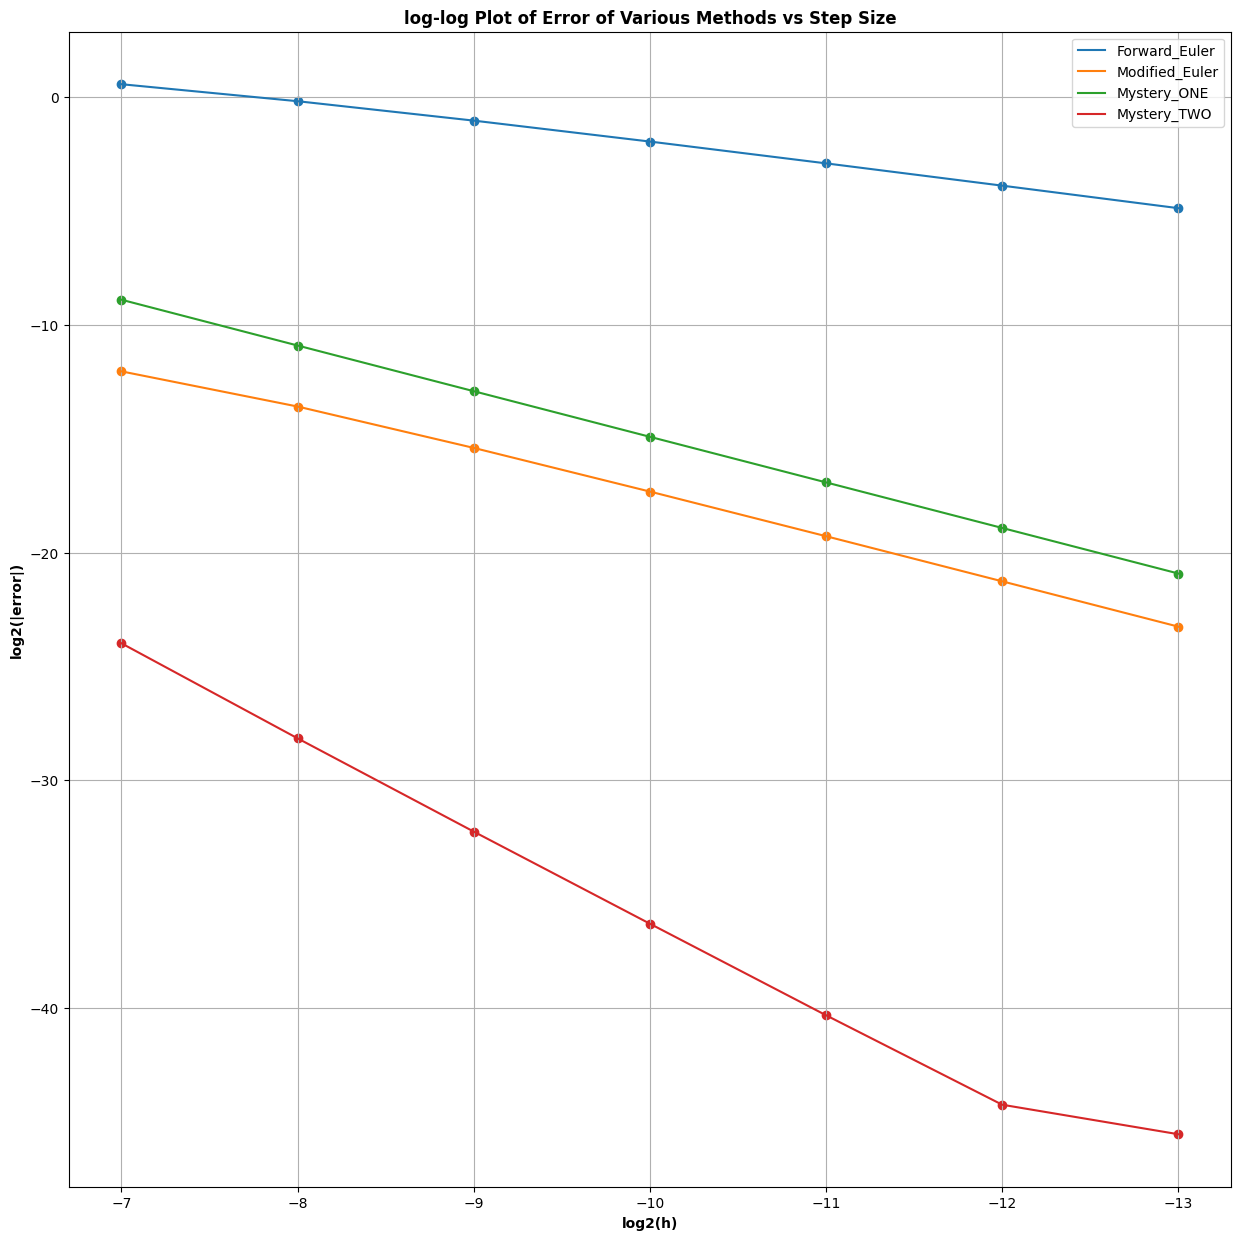

In [8]:
def f(t,x):
    return x**2*np.cos(np.pi*t)

def sol(t):
    return -2*np.pi/(2*np.sin(np.pi*t)-np.pi)

end = sol(8.5)

funcs_errs = [ [Forward_Euler, [] ], [Modified_Euler, [] ], [Mystery_ONE, [] ], [Mystery_TWO, [] ] ]


for j in range(7,14):
    for func in funcs_errs:
        t, value = func[0](f,2,0,8.5,2**-j)
        err = abs(end-value[-1])
        log_err = np.log2(err)
        func[1].append(log_err)

for i in range(4):
    print(f'Function: {funcs_errs[i][0].__name__}, Log of Errors: {funcs_errs[i][1]}')

fig = plt.figure(figsize=(15,15))

for func in funcs_errs:
    plt.plot([-j for j in range(7,14)], func[1], label=func[0].__name__)
    plt.scatter([-j for j in range(7,14)], func[1])

plt.legend()
plt.grid()
plt.gca().invert_xaxis()
plt.xlabel('log2(h)', fontweight='bold')
plt.ylabel('log2(|error|)', fontweight='bold')
plt.title('log-log Plot of Error of Various Methods vs Step Size', fontweight='bold')


Based on the printed log error values, the slope is about 1 for Forward Euler, about 2 for RK2, about 2 for Mystery 1, and about 4 for Mystery 2 (aka RK4). I'm not sure why the slope for RK4 becomes smaller between $\log_2(h)=-12,-13$ while the slope everywhere else is relatively uniformn. The slope should be converging to 4 instead of jumping down to about 1.3 .

### Question 4
If you are handed an initial value problem on the street, which solver would you choose? Pick from
* Forward Euler
* Modified Euler
* Mystery Routine 1
* Mystery Routine 2

Explain your choice.

### Answer

I guess it depends on the application. If we're sending a human to the moon I would want to use mystery routine 2 or something with an even higher rate of convergence, but if we just need an approximation to sketch a graph then even Forward Euler would suffice. If there are no other considerations besides accuracy then certainly mystery 2 is the most accuracte.  